In [50]:
your_local_path=""

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


C:\Users\rr00547872\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rr00547872\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df=pd.read_csv("Abalone.csv")

# Exploratory Data Analysis

In [53]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


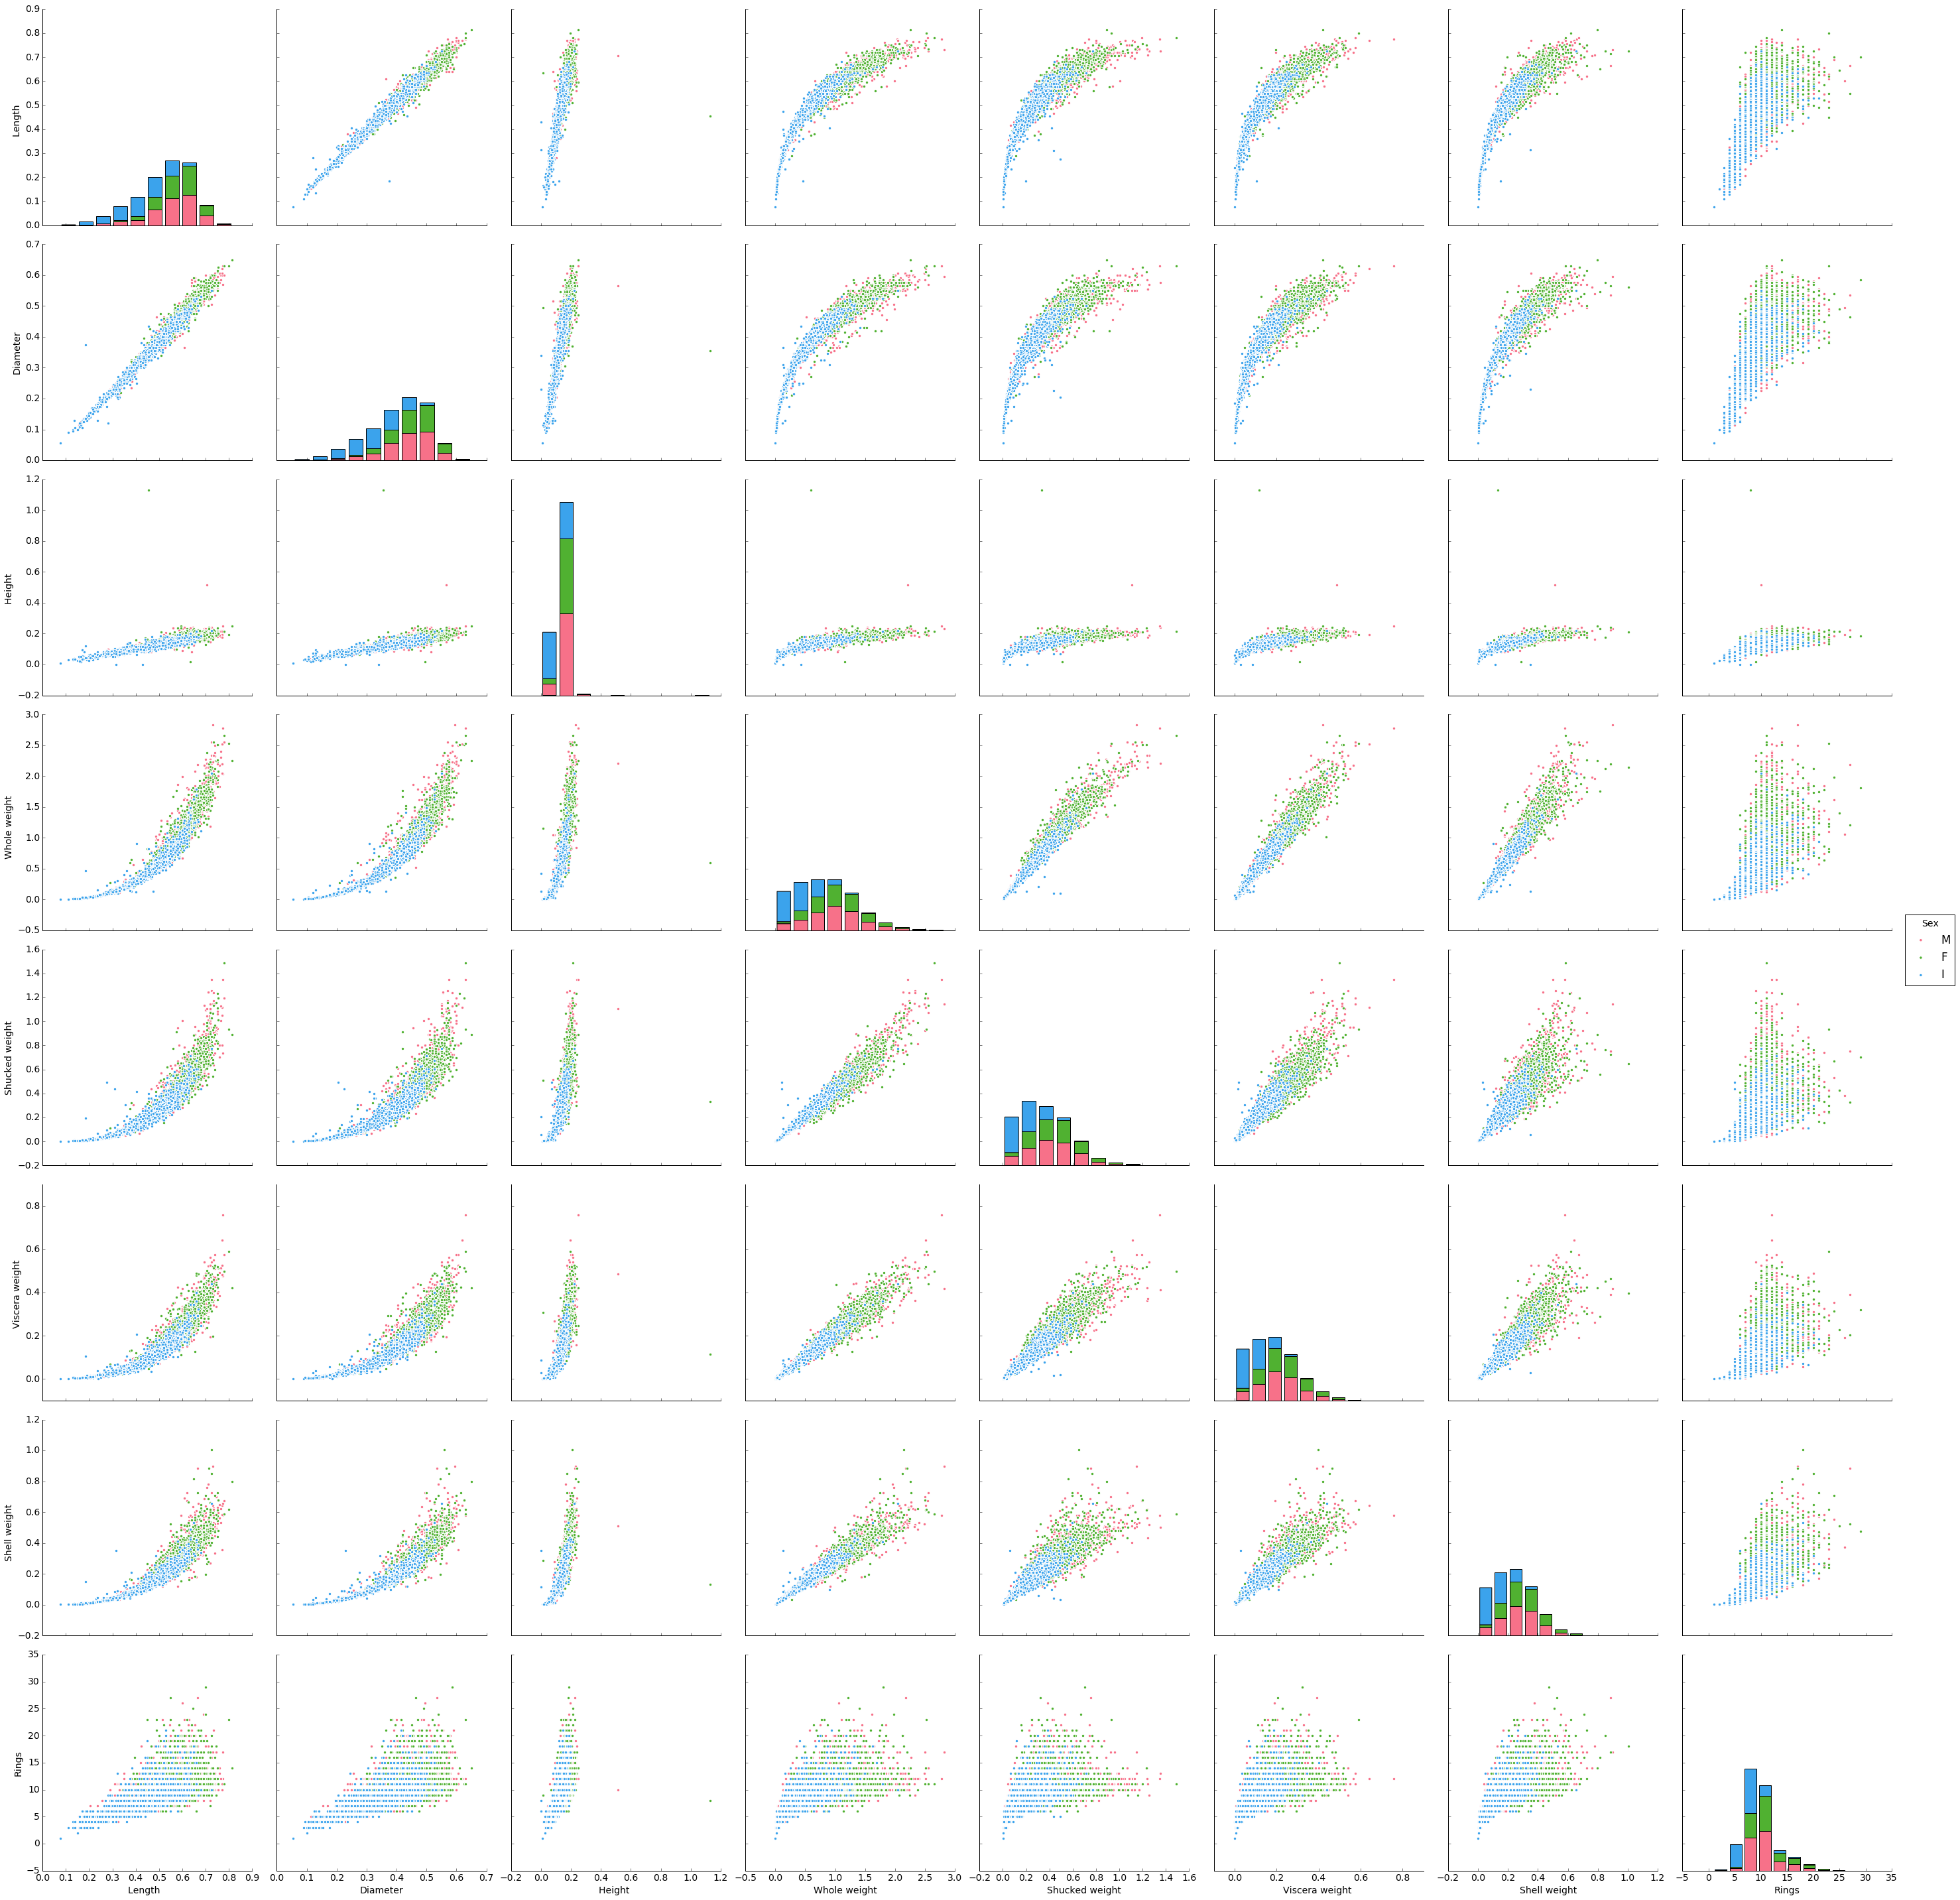

In [54]:
# Scatter Plot
# color pallete- http://seaborn.pydata.org/tutorial/color_palettes.html
import seaborn as sns
sns.pairplot(df, hue="Sex", palette="husl", size =5)
plt.show()

In [55]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [56]:
df.columns = [c.strip() for c in df.columns]

In [57]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [94]:
y=df.Sex
feature_cols = ['Length','Height','Shucked weight','Rings']
x=df[feature_cols]


In [95]:
x.head()

,Length,Height,Shucked weight,Rings
0,0.455,0.095,0.2245,15
1,0.350,0.090,0.0995,7
2,0.530,0.135,0.2565,9
3,0.440,0.125,0.2155,10
4,0.330,0.080,0.0895,7


In [96]:
x.corr()

,Length,Height,Shucked weight,Rings
Length,1.000000,0.827554,0.897914,0.556720
Height,0.827554,1.000000,0.774972,0.557467
Shucked weight,0.897914,0.774972,1.000000,0.420884
Rings,0.556720,0.557467,0.420884,1.000000


# Standardizing the input

**Time for some preprocessing** - Observe how the 'Rings' column has integer values whereas every other column contains floating point numbers.

In [97]:
#Standardizing the input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_transformed=ss.fit_transform(x)
x = x_transformed

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3759, 4)
(418, 4)
(3759,)
(418,)


# Logistic Regression

In [133]:
## Building the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_model=log_reg.fit(x_train,y_train)
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [134]:
## Prediction with logistic regression model
log_prd=log_model.predict(x_test)
print(accuracy_score(y_test,log_prd))
print(confusion_matrix(y_test,log_prd))
print(classification_report(y_test,log_prd))

0.566985645933
[[ 41  25  52]
 [ 11 113  13]
 [ 41  39  83]]
             precision    recall  f1-score   support

          F       0.44      0.35      0.39       118
          I       0.64      0.82      0.72       137
          M       0.56      0.51      0.53       163

avg / total       0.55      0.57      0.55       418



# SVC

In [135]:
#Prediction with SVC model
clf=SVC(kernel='linear', decision_function_shape='ovr')
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.569377990431
[[  8  18  92]
 [  1 111  25]
 [  9  35 119]]
             precision    recall  f1-score   support

          F       0.44      0.07      0.12       118
          I       0.68      0.81      0.74       137
          M       0.50      0.73      0.60       163

avg / total       0.54      0.57      0.51       418



# Perform GridSearch

In [137]:
params={"kernel":('linear','rbf'),"C":[1,50,100],"gamma":[0.03,1,10],"decision_function_shape":('ovr','ovo')}## Please keep patience, It'll take long time

In [138]:
grid=GridSearchCV(clf,params)
grid_model=grid.fit(x_train,y_train)

In [139]:
grid_model.best_params_

{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 0.03, 'kernel': 'rbf'}

In [140]:
grid_pred=grid_model.predict(x_test)

In [142]:
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

0.586124401914
[[ 20  16  82]
 [  6 109  22]
 [ 15  32 116]]
             precision    recall  f1-score   support

          F       0.49      0.17      0.25       118
          I       0.69      0.80      0.74       137
          M       0.53      0.71      0.61       163

avg / total       0.57      0.59      0.55       418



# Applying PCA

[ 0.76284089  0.16049505  0.05517111  0.02149294]


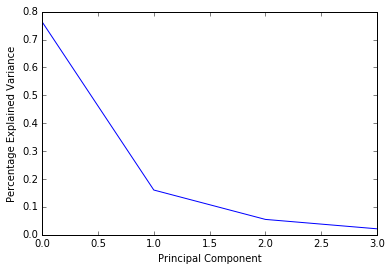

In [143]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)
pca_model.fit(x)
print (pca_model.explained_variance_ratio_)
#Plot the explained variance
plt.plot(pca_model.explained_variance_ratio_);
plt.xlabel('Principal Component');
plt.ylabel('Percentage Explained Variance');

In [144]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


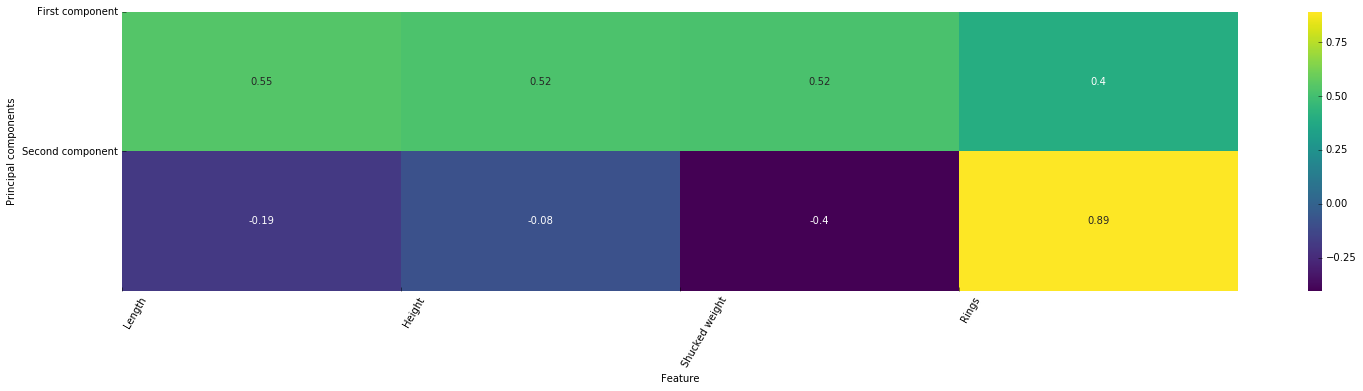

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Visualize coefficients using heat map
plt.figure(figsize=[25,5])
sns.heatmap(pca_model.components_[0:2,:],annot=True,cmap='viridis')
plt.yticks([0,1],["First component","Second component"],rotation=360,ha="right")
plt.xticks(range(len(feature_cols)),feature_cols,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [146]:
x_pca = PCA(n_components=2)
#Build a PCA model with just the training data
train_pca = x_pca.fit_transform(x_train)
#Fit the test data to the above PCA model
test_pca = x_pca.fit_transform(x_test)

In [147]:
test_pca

array([[ -3.75746374e+00,  -1.61264928e-01],
       [  1.70479879e+00,  -9.00232118e-01],
       [ -1.29414646e+00,   2.90220184e-01],
       [  6.95665161e-01,  -5.02110555e-01],
       [  6.22197300e-01,   1.18838582e+00],
       [  4.51076224e-02,   1.44661178e+00],
       [  2.54362222e+00,  -8.05317458e-01],
       [  4.78356267e-01,  -4.92573352e-01],
       [  1.88856160e+00,   6.30341279e-01],
       [ -2.93553046e+00,  -1.04171987e-01],
       [ -3.20450796e-01,  -4.52665405e-01],
       [ -6.71983878e-01,  -6.16349693e-01],
       [ -1.50336176e-02,  -7.00680671e-01],
       [  1.92211239e+00,  -5.43824683e-01],
       [  7.02505289e-01,  -2.76096455e-01],
       [ -1.94561794e+00,   5.94642609e-01],
       [  3.54075623e-01,   1.58557697e+00],
       [  1.16756422e+00,  -4.29561874e-01],
       [ -1.55813390e+00,  -2.48750421e-01],
       [  3.61109342e-01,  -7.09323417e-01],
       [ -3.78975568e+00,  -1.40291650e-01],
       [  2.35979583e+00,  -4.24817369e-01],
       [  

In [148]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pcalg = LogisticRegression(C=1e42)

# fit model
pcalg.fit(train_pca, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
# make class predictions for the testing set
y_pred_class_pca = pcalg.predict(test_pca)

In [150]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_pca))
print (metrics.precision_recall_fscore_support(y_test, y_pred_class_pca, average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_class_pca))

0.181818181818
(0.17638608807835865, 0.18181818181818182, 0.17772375249910552, None)
[[ 2 79 37]
 [57 14 66]
 [ 5 98 60]]


In [125]:
#Prediction with SVC model
clf=SVC(kernel='linear',C=164, decision_function_shape='ovr')
model=clf.fit(train_pca,y_train)
y_pred=model.predict(test_pca)
clf

SVC(C=164, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.549441786284
[[ 25  49 290]
 [  5 309 101]
 [ 26  94 355]]
             precision    recall  f1-score   support

          F       0.45      0.07      0.12       364
          I       0.68      0.74      0.71       415
          M       0.48      0.75      0.58       475

avg / total       0.54      0.55      0.49      1254

